<a href="https://colab.research.google.com/github/PauloVilarinho/DataScience/blob/master/Projects/An%C3%A1liseCovid19/An%C3%A1lise_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença causada pelo recém-descoberto corona vírus. Essa doença é transmitida principalmente por goticulas de água emitidas por tosses e espirros de pessoas infectadas.

Por se tratar de uma doença muito nova, muito pouco se sabe sobre a doença, por isso estudos estão sendo realizados pelo mundo todo com o objetivo de melhor entender esta doença.

<center><img alt="Colaboratory logo" width="50%" src="http://www.unifap.br/wp-content/uploads/2020/03/mental-health-coronavirus_30a7c8ab8a1b44edace64320a05b9e45.jpg"></center>

Até o presente momento, conseguimos entender que é uma doença que possui baixa mortalidade porem um altissimo índice de contaminação, podendo alcançar muitas pessoas. Devido a essa velocidade de propagação, se trata de uma doença extremamente perigosa, capaz de matar milhares de pessoas.

Com o intuito de melhor entender o panorama global desta doença, irei realizar uma análise em cima dos dados coletados pelos governos de todo o mundo sobre a doença.

## Obtenção dos Dados

Os dados da covid-19 tem se mostrado uma verdadeira dor de cabeça nesses tempos, com muitas pessoas relatando que os dados oficiais estão errados e com uma credibilidade não muito alta sobre esses dados.

Com isso resolvemos utilizar o data set do Our World in Data, com dados de todos os países do mundo, permitindo analisar o impacto de varios tipos de dados nas mortes de um país.

### Dicionário de Variáveis
O primeiro grande passo para essa análise é entender qual tipo de dado encontraremos nesses conjunto de dados. Para isso faremos um dicionário de variáveis, explicando exatamente o que cada coluna representa.

 - `iso_code` - Sigla de 3 letras do país em questão, similar as siglas em jogos de futebol. Ex.: BRA, USA.
 - `continent` - Continente no qual o país se encontra.
 - `location` - Nome do país.
 - `date` - Dia em qeu foram medidos os dados.
 - `total_cases` - Número total de casos registradas no dia no país.
 - `new_cases` - Número de novos casos registrados no dia no país.
 - `total_deaths` - Número total de mortes registradas no dia no país.
 - `new_deaths` - Número de novos mortes registrados no dia no país.
 - `total_cases_per_million` - Número total de casos registradas no dia no país por 1,000,000 de pessoas.
 - `new_cases_per_million` - Número de novos casos registrados no dia no país por 1,000,000 de pessoas.
 - `total_deaths_per_million` - Número total de mortes registradas no dia no país por 1,000,000 de pessoas.
 - `new_deaths_per_million` - Número de novos mortes registrados no dia no país por 1,000,000 de pessoas.
 - `total_test` - Número total de testes no dia no país.
 - `new_test` - Número de novos testes no dia no país.
 - `new_test_smoothed` - Número de novos testes no dia no país(utilizando uma média dos ultimos 7 dias). Serve especialmente para países que não possuem registros diários de testes, permitindo uma análise mesmo nesses casos.
 - `total_test_per_thousand` - Número total de testes no dia no país por 1,000 pessoas.
 - `new_test_per_thousand` - Número de novos testes no dia no país por 1,000 pessoas.
 - `new_test_smoothed_per_thousand` - Número de novos testes no dia no país(utilizando uma média dos ultimos 7 dias) por 1,000 pessoas.
 - `units_test` - Local responsável por emitir os dados dos testes.
 - `stringency_index` - Índice de medida de quão restrito foram as medidas tomadas pelo governo do local, variando de 0 (sem restrição) a 100 (extremamente restrito).
 - `population` - População do pais em 2020.
 - `population_density` - População dividido pela área do país, medida em kilometros quadrados.
 - `median_age` - Mediana da idade da população.
 - `age_65_older` - Parcela da população que está acima dos 65 anos.
 - `age_70_older` - Parcela da população que está acima dos 70 anos.
 - `gdp_per_capita` - PIB per capita do pais.
 - `extreme_poverty` - Parcela da população em estado de extrema pobreza.
 - `cvd_death_rate` - Índice de morte por doenças cardiovasculares em 2017.
 - `diabetes_prevalence` - Parcela da população que possui diabetes. 
 - `female_smokers` - Parcela das mulheres do país que fumam.
 - `male_smokers` - Parcela das homens do país que fumam.
 - `handwashing_facilities` - Parcela da população que possui locais adequados para se higienizar.
 - `hospital_beds_per_thousand` - Quantidade de leitos de hospital por 1000 pessoas.
 - `life_expectancy` - expectativa de vida.

 Como é possivel ver, existem uma infinidade de dados que podem ser analisados, para trassar uma análise sobre o corona vírus, permitindo entender melhor quais caracteristicas os paises mais afetados tem em comum.


### Importando os dados do COVID-19

Agora para finalmente começar a análise de fato, vamos importar os dados do Our World In Data e começar analisá-lo.

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

today = "2020-07-16"


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

Agora com o conjuntod e dados em mão vamos começar a explorar esses dados em busca de informações relevantes. Primeiramente vamos analisar a estrutura desse conjunto de dados.
### Análise Exploratória Inicial


Começamos por analisar o formato no qual os dados estão colocados. Começaremos abrindo as primeiras 5 entradas para entender melhor o conjunto de dados.

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Agora iremo observar o tamanho desse conjunto de dados para entender suas dimensões.

In [ ]:

print("O conjunto de dados possui {} linhas e {} colunas.".format(df.shape[0],df.shape[1]))

O conjunto de dados possui 30654 linhas e 34 colunas.


Agora vamos analisar em que tipo de variavel estão armazenados os dados do nosso conjunto de dados.

In [ ]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

Observando o tipo de dado armazenado, podemos percerber que as datas estão armazenadas no tipo object, que representa um texto. Para melhor manipulação desses dados é necessário transformar essa data em date time. Isso permite acessar vários métodos de date time que não estariam acessíveis ao tipo object.

In [ ]:
df.date = pd.to_datetime(df.date)

df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


Por ultimo, gostariamos de saber quais são as colunas que possuem a maior quantidade de valores vazios. Já que colunas com quantidades muito grande de valores vazios acabam tendo seus impactos mascarados devido a ausência deles em várias linhas.

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.699289
new_tests_per_thousand             0.699289
total_tests_per_thousand           0.689926
total_tests                        0.689926
new_tests_smoothed_per_thousand    0.663078
new_tests_smoothed                 0.663078
tests_units                        0.638481
handwashing_facilities             0.590005
extreme_poverty                    0.404515
male_smokers                       0.290174
female_smokers                     0.281692
stringency_index                   0.187773
hospital_beds_per_thousand         0.178476
aged_65_older                      0.111796
gdp_per_capita                     0.109513
aged_70_older                      0.103510
median_age                         0.098878
cvd_death_rate                     0.098356
diabetes_prevalence                0.068213
population_density                 0.044464
life_expectancy                    0.013930
new_deaths_per_million             0.012657
total_deaths_per_million        

Como podemos ver, os dados que mais possuem valores vazios são os relacionados a testes e a condições populacionais mais específicas, como quantidade de pessoas que possuem acesso a saneamento básico mínimo para manterem sua higiene pessoal. Isso, de certa forma, já era esperado, uma vez que esses dados são de mais difícil obtenção e muito governos não conseguem fornecer esses dados de forma consistente, o que pode acabar influenciado os resultados dessa análise em relação a essas colunas.

#### Exploração dos Dados

Agora que já entendemos como esse conjunto de dados se comporta em sua estrutura, podemos finalmente começar a adentrar nos seus dados e tentar entender melhor o panorama do covid-19 no mundo. 

Primeiramente, vamos observar quais são os países que possuem o maiores número de casos e de mortes. 

In [ ]:
df.loc[df.date == today].sort_values(by="total_cases", ascending=False)[1:11]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29165,USA,North America,United States,2020-07-16,3499291.0,67717.0,137419.0,953.0,10571.792,204.581,415.160,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
4132,BRA,South America,Brazil,2020-07-16,1966748.0,39924.0,75366.0,1233.0,9252.698,187.825,354.564,5.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
13001,IND,Asia,India,2020-07-16,968876.0,32695.0,24915.0,606.0,702.082,23.692,18.054,0.439,12739490.0,326826.0,9.231,0.237,285523.0,0.207,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66
23137,RUS,Europe,Russia,2020-07-16,746369.0,6422.0,11770.0,156.0,5114.412,44.006,80.653,1.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58
21968,PER,South America,Peru,2020-07-16,337724.0,3857.0,12417.0,188.0,10242.799,116.979,376.594,5.702,304324.0,6555.0,9.230,0.199,3732.0,0.113,people tested,NaN,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74
5862,CHL,South America,Chile,2020-07-16,321205.0,1712.0,7186.0,117.0,16802.756,89.558,375.911,6.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.911621e+07,24.282,35.4,11.087,6.938,22767.037,1.3,127.993,8.46,34.2,41.5,NaN,2.11,80.18
18296,MEX,North America,Mexico,2020-07-16,317635.0,6149.0,36906.0,579.0,2463.571,47.692,286.242,4.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
25412,ZAF,Africa,South Africa,2020-07-16,311049.0,12757.0,4453.0,107.0,5244.577,215.095,75.082,1.804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930869e+07,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13
28966,GBR,Europe,United Kingdom,2020-07-16,291911.0,538.0,45053.0,85.0,4300.017,7.925,663.657,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
13392,IRN,Asia,Iran,2020-07-16,264561.0,2388.0,13410.0,199.0,3149.800,28.431,159.656,2.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.399295e+07,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68


In [ ]:
df.loc[df.date == today].sort_values(by="total_deaths", ascending=False)[1:11]

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
29165,USA,North America,United States,2020-07-16,3499291.0,67717.0,137419.0,953.0,10571.792,204.581,415.160,2.879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
4132,BRA,South America,Brazil,2020-07-16,1966748.0,39924.0,75366.0,1233.0,9252.698,187.825,354.564,5.801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
28966,GBR,Europe,United Kingdom,2020-07-16,291911.0,538.0,45053.0,85.0,4300.017,7.925,663.657,1.252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.788600e+07,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32
18296,MEX,North America,Mexico,2020-07-16,317635.0,6149.0,36906.0,579.0,2463.571,47.692,286.242,4.491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
14302,ITA,Europe,Italy,2020-07-16,243506.0,162.0,34997.0,13.0,4027.434,2.679,578.828,0.215,6103492.0,50432.0,100.948,0.834,42403.0,0.701,tests performed,NaN,6.046183e+07,205.859,47.9,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51
10043,FRA,Europe,France,2020-07-16,173304.0,927.0,30120.0,91.0,2655.043,14.202,461.443,1.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.527351e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66
13001,IND,Asia,India,2020-07-16,968876.0,32695.0,24915.0,606.0,702.082,23.692,18.054,0.439,12739490.0,326826.0,9.231,0.237,285523.0,0.207,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66
13392,IRN,Asia,Iran,2020-07-16,264561.0,2388.0,13410.0,199.0,3149.800,28.431,159.656,2.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.399295e+07,49.831,32.4,5.440,3.182,19082.620,0.2,270.308,9.59,0.8,21.1,NaN,1.50,76.68
21968,PER,South America,Peru,2020-07-16,337724.0,3857.0,12417.0,188.0,10242.799,116.979,376.594,5.702,304324.0,6555.0,9.230,0.199,3732.0,0.113,people tested,NaN,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74
23137,RUS,Europe,Russia,2020-07-16,746369.0,6422.0,11770.0,156.0,5114.412,44.006,80.653,1.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58


Um fato bastante curioso a ser analisado é que India e Rússia, apesar de serem o terceiro e quarto respectivamente em número de infectados, possuem posições bem abaixo no número de mortes, com a Rússia nem aparecendo no rank dos 10 paises mais afetados. Vamos observar utilizando um grafico de barras para melhor analisar essas magnitudes.

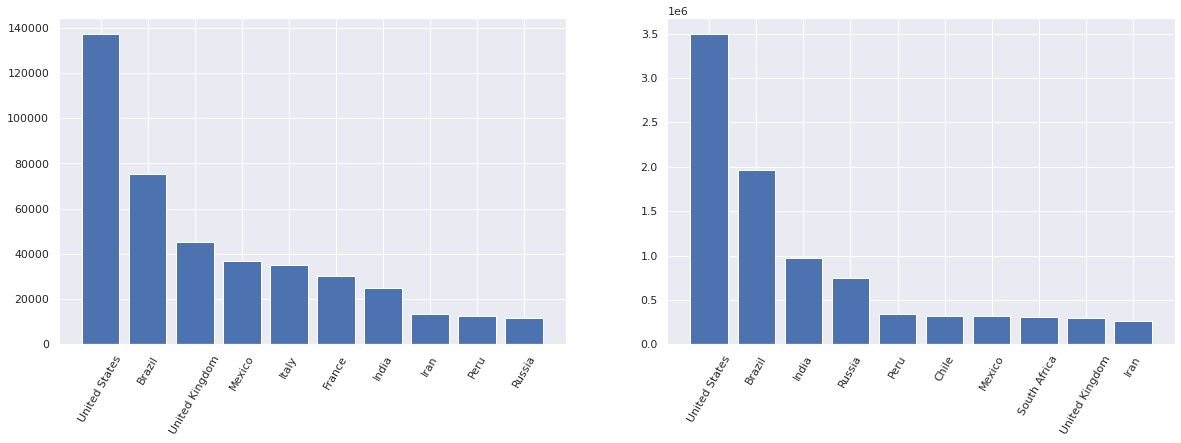

In [ ]:

top10_total_deaths = df.loc[df.date == today, ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:11]
top10_total_cases = df.loc[df.date == today, ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:11]

fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].bar('location', 'total_deaths', data=top10_total_deaths)
ax[1].bar('location', 'total_cases', data=top10_total_cases)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(60)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(60)

fig.show()

Como podemos visualizar, o número de casos não possui uma relação direta com o número de mortes, fazendo países que possuem muitos casos nào terem tantas mortes registradas.

Agora vamos observar a relação entre os número total de casos e o total de mortes no decorrer da pandemia no mundo todo. Essa visualização será feita tanto em escala linear quanto em escala logarítmica.

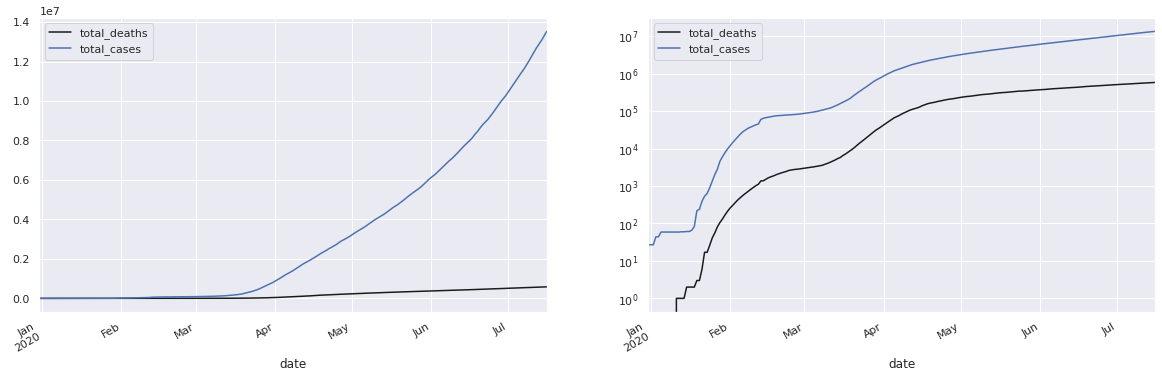

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

location = 'World'
columns = ['total_deaths', 'total_cases']
styles = ['k-','b-']

df.loc[df.location == location].reset_index(drop=True).plot('date',columns,style=styles, ax=ax[0]);
ax[0].set_yscale('linear')
df.loc[df.location == location].reset_index(drop=True).plot('date',columns,style=styles, ax=ax[1]);
ax[1].set_yscale('log')
fig.autofmt_xdate()
fig.show()



Para entender melhor o que esses gráficos representam, precisamos primeiro entender o que uma escala logarítmica significa. Quando estamos em uma escala logaritmica o crescimento se acelera quando se afasta do eixo, já que cada quadrado no gráfico representa uma multiplicação por 10, e nào um crescimento linear. Então porque utilizamos escalas logarítmicas?

Esse tipo de escala nos permite analisar de forma mais visual o crescimento exponencial, facilitando a visualização da taxa de crescimento de forma mais clara. Quando um gráfico em escala logaritmica começa a perder sua inclinação(como podemos ver aqui) ele representa uma diminuição na taxa de crescimento do valor, ou seja, mesmo que o valor continue crescendo, ele está crescendo proporcionalmente mais devagar do que antes.

Com isso é possivel analisar que existe uma tendência de estabilização do número de casos no mundo, fazendo com que as taxas de crescimento comecem a diminuir com o tempo.

### Como o vírus está progredindo?

A grande preocupação das organizaçòes de saúde e dos governantes é entender como o vírus está progredindo. 

Para melhor entender isso, iremos construir um gráfico de linha mostrando o numero total de mortes no mundo todo.

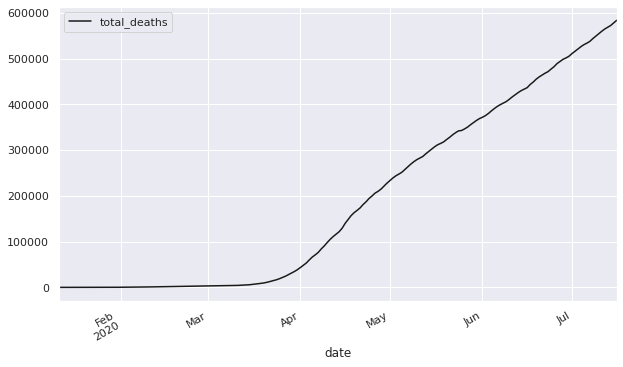

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

location = 'World'
columns = ['total_deaths']
styles = ['k-','b-']

df.loc[(df.location == location)&(df.total_deaths>=1)].reset_index(drop=True).plot('date',columns,style=styles, ax=ax);
ax.set_yscale('linear')
fig.autofmt_xdate()
fig.show()


### Influencia de outros fatores

Algo que tambem é bastante importante é entender como outros fatores podem afetar o desempenho de cada país com relação a doença.

A forma mais facil de visualizar isso é utilizando um mapa de calor na correlação entre as variáveis. 


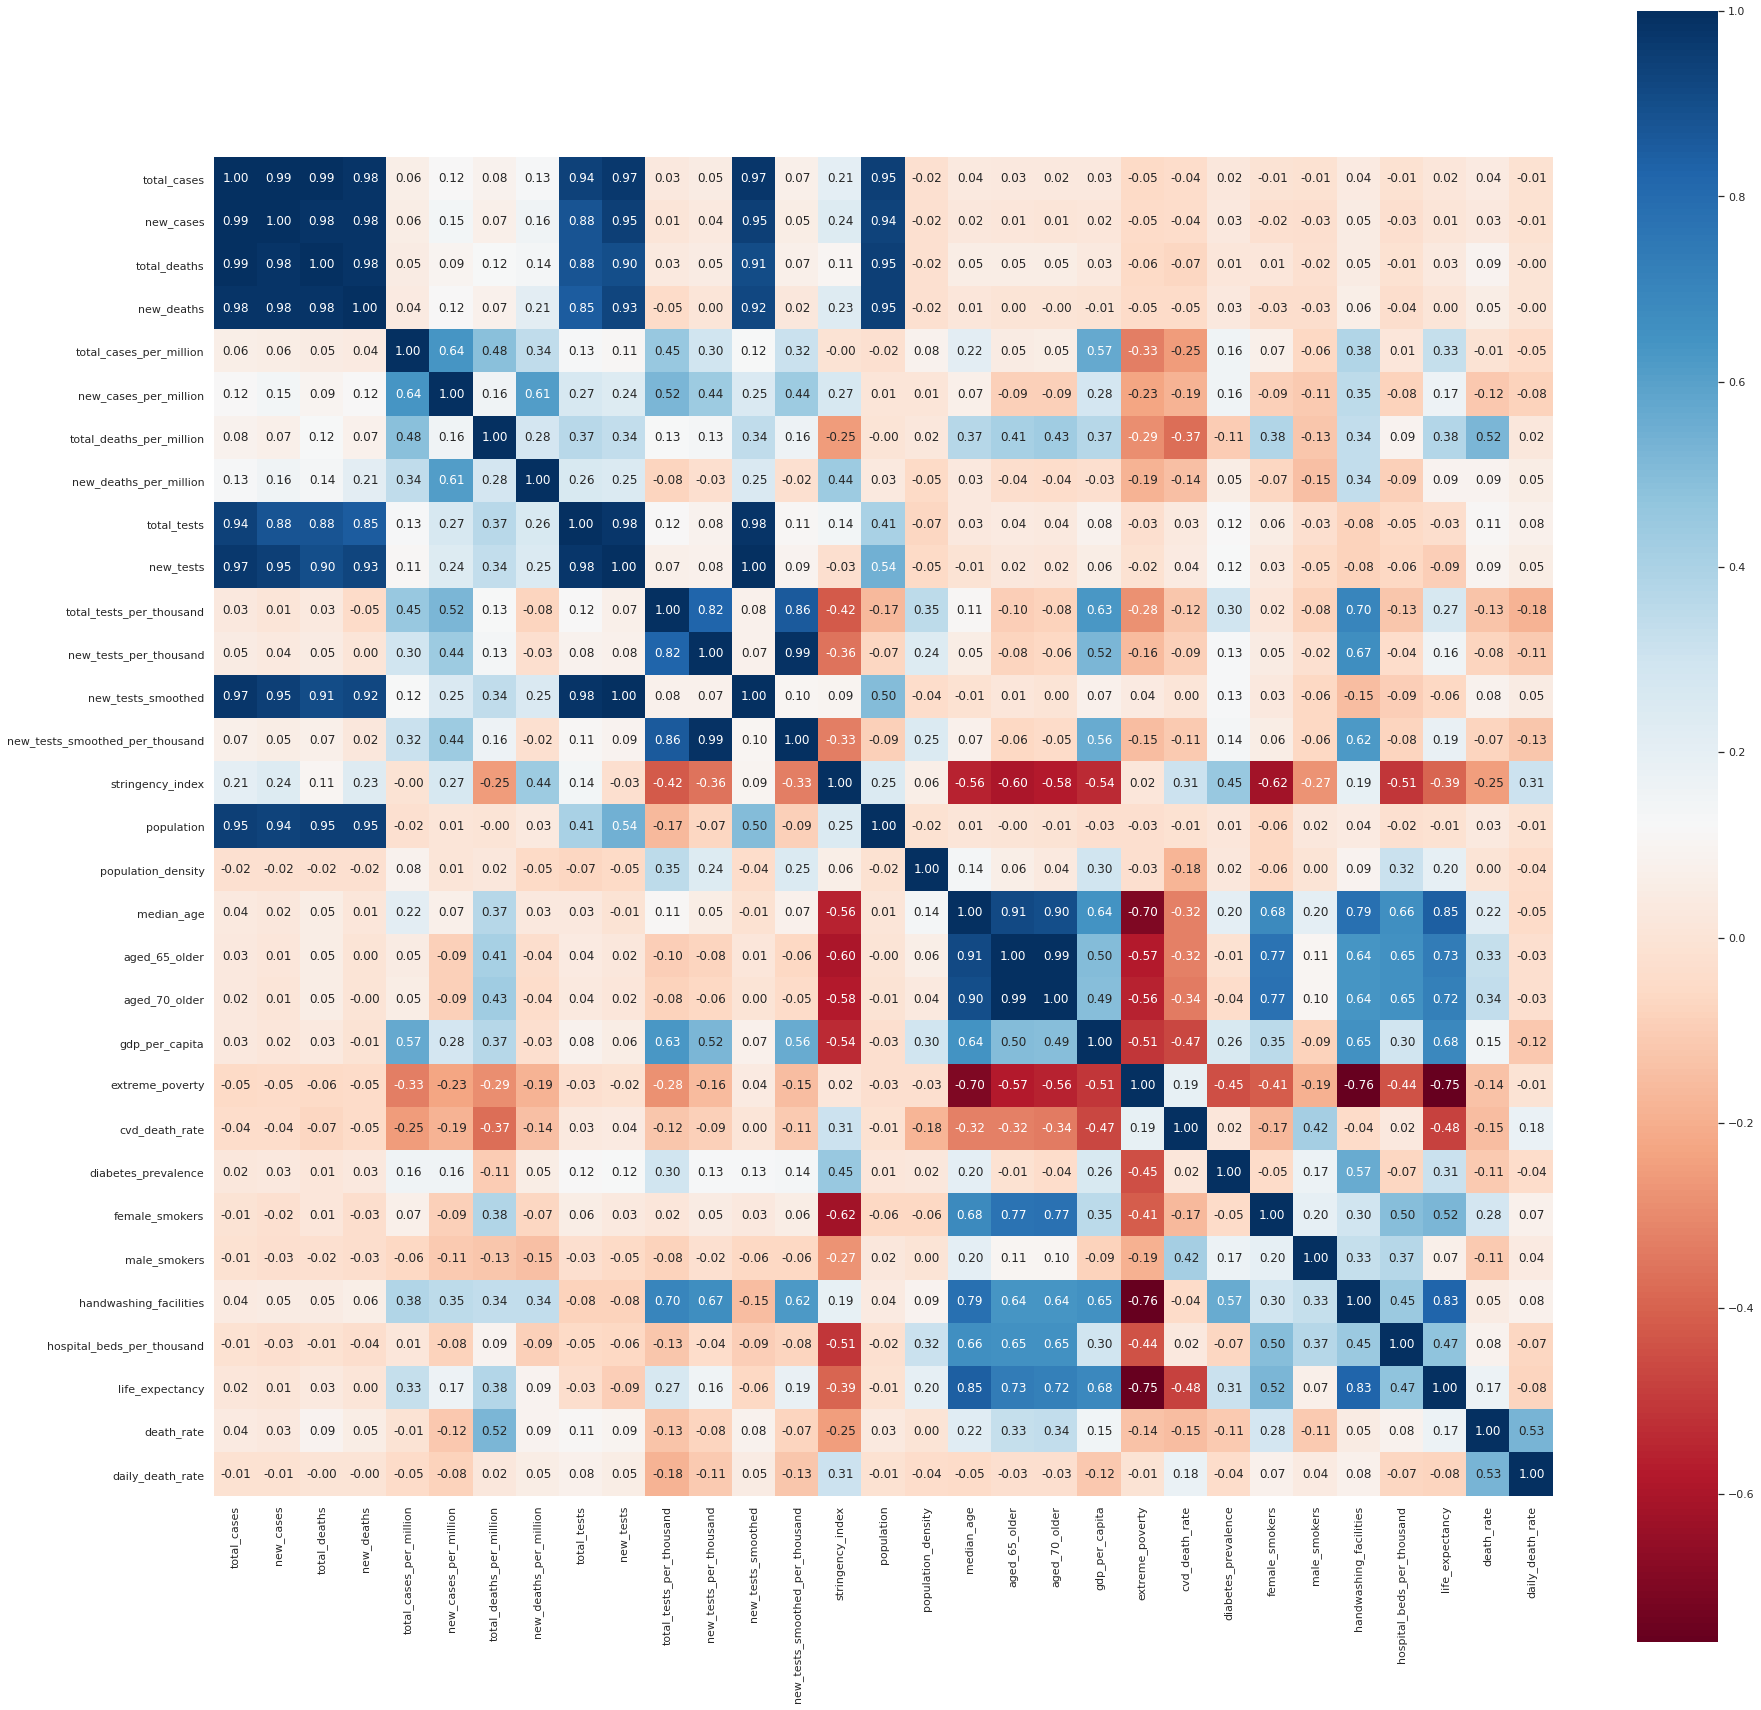

In [ ]:




df['death_rate'] = (df.total_deaths/df.total_cases) * 100
df['daily_death_rate'] = (df.new_deaths/df.new_cases) * 100
new_df = df.copy()

fig,ax = plt.subplots(figsize=(30,30))

sns.heatmap(new_df[new_df.date == "2020-07-15"].corr(),cmap="RdBu", fmt='.2f', square=True, linecolor='white',annot=True,ax=ax)

fig.show()

Neste mapa de calor, podemor entender que cores mais próximas do azul significam correlação posittiva e cores mais próximas do vermelho representam correlação negativa.

Analisando a correlação das outras variaveis com a variavel `total_deaths_per_million` podemos entender quais fatores realmente influenciam o aumento dessa quantidade de mortes.

Coisas interessantes a serem notadas são:
 
 - Por algum motivo a porcentagem de mulheres fumantes tem um impacto maior na quantidade de mortes do que a porcentagem de homens fumantes. 
 - Expectativa de Vida e acesso a locais de saneamento para lavar as mão tambem representam uma relação positiva com  a quantidade de mortes.
 - Como esperado, paises com a população mais velha, possuem uma quantidade maior de mortos por milhão de pessoas.
 - O índice de rigorosidade nas restrições tem relação negativa com a quantidade de mortes.

### Análise Exploratória para o Brasil

Depois desse panorama mais geral da pandemia, iremos focar nos dados somente do Brasil.

In [ ]:
df_brasil = df.loc[df.location == 'Brazil'].copy()

df_brasil.loc[df.total_deaths >= 1].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,death_rate,daily_death_rate
4012,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.343643,1.754386


In [ ]:
df_brasil.loc[df.total_cases >= 1].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,death_rate,daily_death_rate
3991,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.0,0.0


Como podemos ver o primeiro caso de covid aconteceu no dia 26 de fevereiro de 2020, e a primeira morte registrada no país foi no dia 18 de março de 2020.

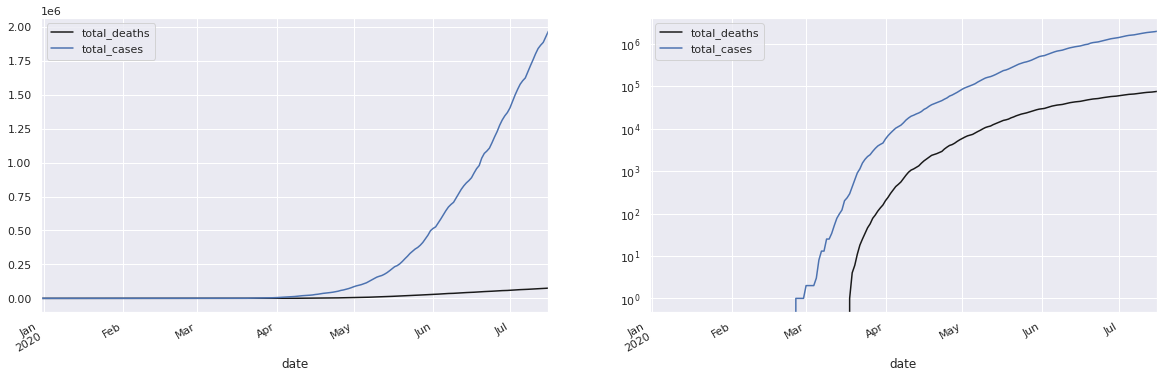

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

columns = ['total_deaths', 'total_cases']

styles = ['k-','b-']

df_brasil.reset_index(drop=True).plot('date',columns,style=styles, ax=ax[0]);
ax[0].set_yscale('linear')
df_brasil.reset_index(drop=True).plot('date',columns,style=styles, ax=ax[1]);
ax[1].set_yscale('log')
fig.autofmt_xdate()
fig.show()


O panorama da quantidade de casos e de mortes no país segue a do mundo, seguindo em crescimento porem com uma tendencia de desaceleração do crescimento.

## Conclusão

Por fim podemos ver com esses dados alguns pontos bastante importantes

- A velocidade da infecção já está diminuindo e muitas vezes se mostrando estável.
- O nível de restrição possui uma relação negativa com o número de mortos, quanto maior a o nível de restrição menor o número de mortos.
- Alguns paises apesar de terem números muito grandes de casos, possuem números baixos de morte em relação aos casos.